In [3]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/shruti/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(0, 1)

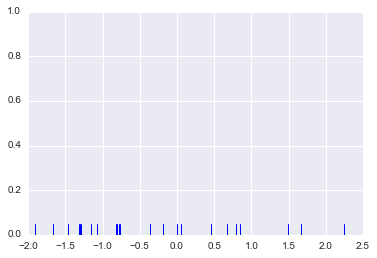

In [6]:
# A rug plot to add ticks when values occured in the plot
dataset = randn(25)
sns.rugplot(dataset)
plt.ylim(0,1)

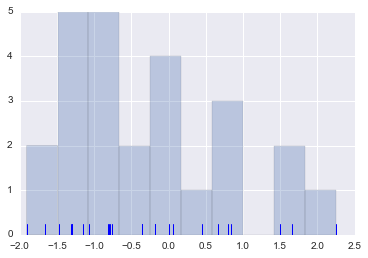

In [7]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

The histogram sets up 10 bins and then just count how many ticks appeared in each bin, setting the height of each bar



(0, 1)

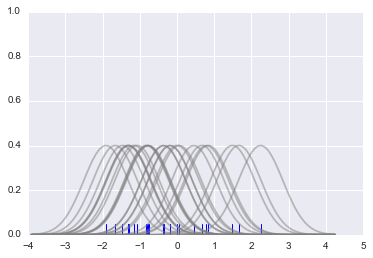

In [8]:
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

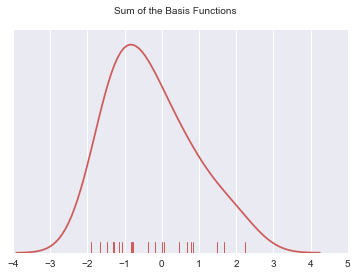

In [15]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

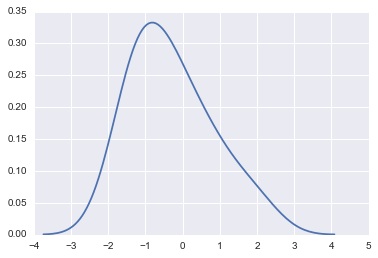

In [16]:
sns.kdeplot(dataset)

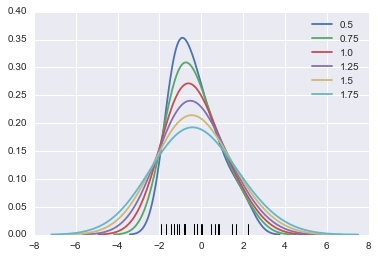

In [17]:
# We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

# Rugplot
sns.rugplot(dataset,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

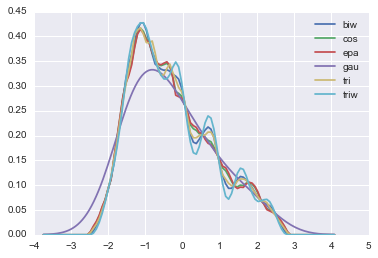

In [18]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

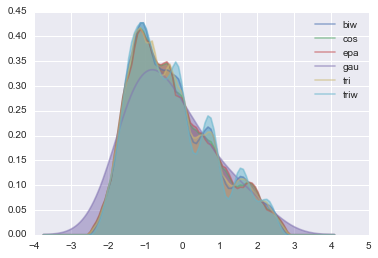

In [19]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

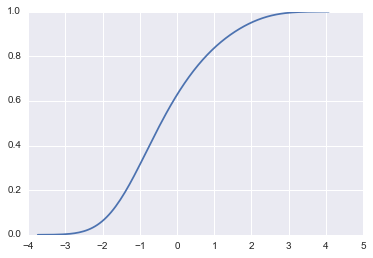

In [21]:
# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

# Multivariate Density Estimation using kdeplot
We can also use kdeplot for multidimensional data. Lets see how it works!

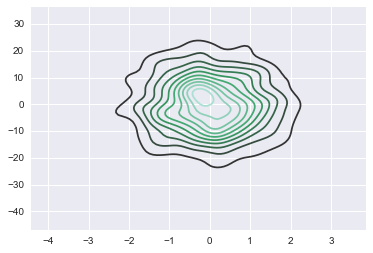

In [22]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe)

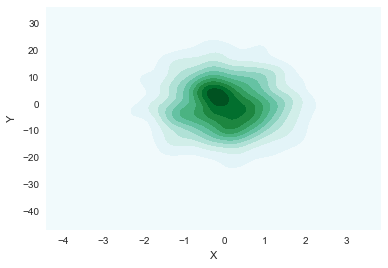

In [23]:
# We could have also passed two vectors seperately, and shade
sns.kdeplot(dframe.X,dframe.Y,shade=True)